In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
data=pd.read_csv('heart.csv')

In [4]:
from sklearn.model_selection import train_test_split

In [5]:
from sklearn.metrics import classification_report,confusion_matrix

In [6]:
from sklearn.preprocessing import StandardScaler

In [7]:
x=data.drop('target',axis=1)
y=data['target']

In [8]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [9]:
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)

In [10]:
from sklearn.ensemble import RandomForestClassifier

In [11]:
rf_model = RandomForestClassifier(random_state=0)
rf_model.fit(x_train, y_train)

RandomForestClassifier(random_state=0)

In [12]:
y_pred = rf_model.predict(x_test)

In [13]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[ 98   0]
 [  0 107]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        98
           1       1.00      1.00      1.00       107

    accuracy                           1.00       205
   macro avg       1.00      1.00      1.00       205
weighted avg       1.00      1.00      1.00       205



In [14]:
from sklearn.metrics import accuracy_score

In [15]:
acc=accuracy_score(y_test,y_pred)*100

In [16]:
print(acc)

100.0


In [17]:
from sklearn.metrics import confusion_matrix

In [18]:
conf_m=confusion_matrix(y_test,y_pred)

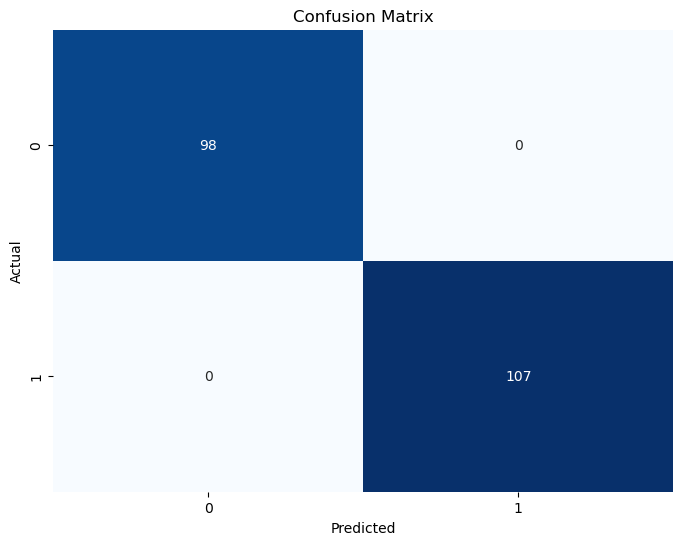

In [19]:
plt.figure(figsize=(8, 6))
sns.heatmap(conf_m, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

C:\Users\hp\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


<Figure size 1000x800 with 0 Axes>

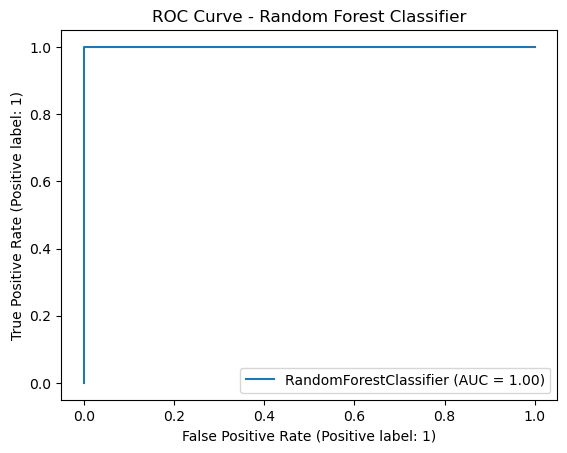

In [20]:
from sklearn.metrics import plot_roc_curve
plt.figure(figsize=(10, 8))
roc_disp = plot_roc_curve(rf_model, x_test, y_test)
plt.title('ROC Curve - Random Forest Classifier')
plt.show()
